In [109]:
# Author: ALi Kerem Yıldız
# ID   :  150170013


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df2m = pd.read_csv("train2_modified.csv") #will be used in Part D

In [110]:
#You can extract keys from dataframe, which you can use to extract features or labels.
print(df1.keys())
df1_x1 = df1['x1']
df1_x2 = df1['x2']
#To extract data as numpy array:
df1_numpy = df1.values
#You can also extract a specific feature as numpy array as well.
df1_x1_numpy = df1['x1'].values


Index(['x1', 'x2', 'y'], dtype='object')


## Part A: Examine training sets

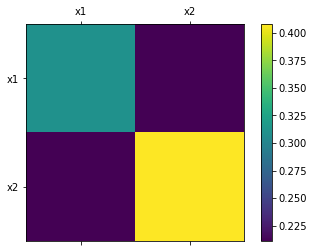

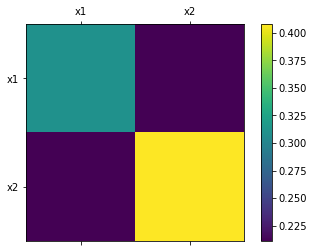

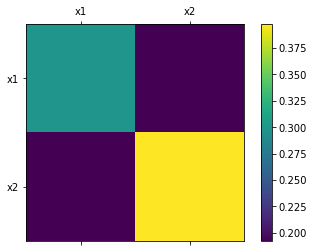

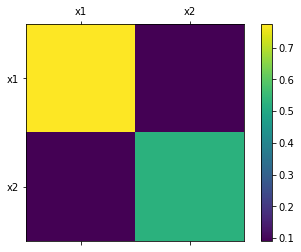

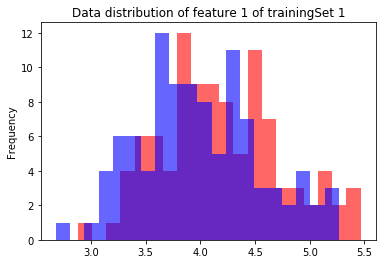

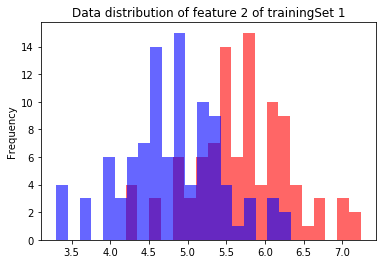

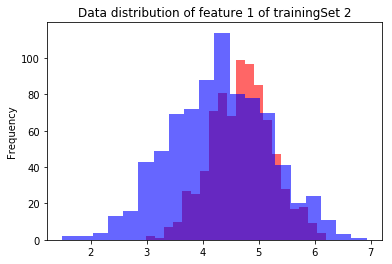

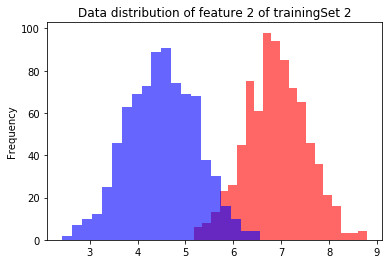

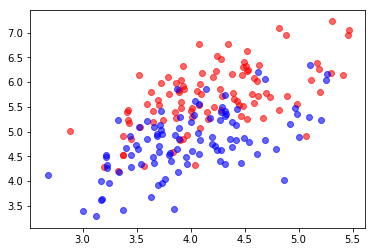

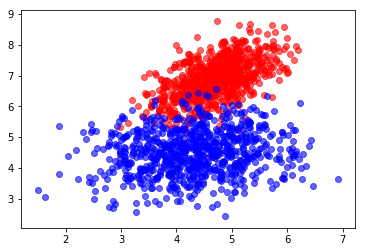

In [111]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)

# PART A.2

def plot(cov_mtrx):
    alpha = ['x1', 'x2']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cov_mtrx,interpolation='nearest') #cov. matrix of dataset1
    fig.colorbar(cax)
    ax.set_xticklabels(['']+alpha)
    ax.set_yticklabels(['']+alpha)
    #---------
    #for the histogram plots use plt.hist() (Remember: 4 of them we want)
    #for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')


# First create dataframe with class values and then drop the 'y' column in order to evaluate matrix that only contains features.
# data was extracted to numpy array via using 'values' and in order to use cov function, 

df1_class0 = df1[df1['y'] == 0].drop(['y'],axis=1).values
cov_df1_class0 = np.cov(np.transpose(df1_class0))

df1_class1 = df1[df1['y'] == 1].drop(['y'],axis=1).values
cov_df1_class1 = np.cov(np.transpose(df1_class1))

df2_class0 = df2[df2['y'] == 0].drop(['y'],axis=1).values
cov_df2_class0 = np.cov(np.transpose(df2_class0))

df2_class1 = df2[df2['y'] == 1].drop(['y'],axis=1).values
cov_df2_class1 = np.cov(np.transpose(df2_class1))

plot(cov_df1_class0)
plot(cov_df1_class1)
plot(cov_df2_class0)
plot(cov_df2_class1)

# COMMENT A.2
# As we can see features are not independent. The reason for that is cov(xi,xj) != 0.
# Except class 1 of training set 2, we can see that Feature 2 is more scattered away than feature 1.
# but in class 1 of training set as we can see it is vice versa.



# PART A.3

for i in range (2):
    plt.figure()
    
    hist = plt.hist(df1_class0[:,i], bins=20, color="red", alpha=0.6, label="c0")
    hist = plt.hist(df1_class1[:,i], bins=20, color="blue", alpha=0.6, label="c1")
    
    plt.gca().set(title='Data distribution of feature {} of trainingSet 1'.format(i+1), ylabel='Frequency')
    
for i in range (2):
    
    plt.figure()
    
    hist = plt.hist(df2_class0[:,i], bins=20, color="red", alpha=0.6, label="c0")
    hist = plt.hist(df2_class1[:,i], bins=20, color="blue", alpha=0.6, label="c1")
    
    plt.gca().set(title='Data distribution of feature {} of trainingSet 2'.format(i+1), ylabel='Frequency')

# COMMENT A.3:
# As we can see in the plots, for trainingset 1, class1 is shifted version of class0 which means
# their covariance matrix will be the same but since they are shifted, their mean is going to be different
# for trainingset 2,if we look plot that shows distribution of feature 2, common area is quite small and we can say
# that they are easily seperable
    
# PART A.4

plt.figure()
sc = plt.scatter(df1_class0[:,0],df1_class0[:,1],color="red",alpha=0.6)
sc = plt.scatter(df1_class1[:,0],df1_class1[:,1],color="blue",alpha=0.6)

plt.figure()
sc = plt.scatter(df2_class0[:,0],df2_class0[:,1],color="red",alpha=0.6)
sc = plt.scatter(df2_class1[:,0],df2_class1[:,1],color="blue",alpha=0.6)

In [112]:
#Implement PART B:


mean_vector_df1_class0 = np.transpose(df1_class0.mean(0))
mean_vector_df1_class1 = np.transpose(df1_class1.mean(0))
mean_vector_df2_class0 = np.transpose(df2_class0.mean(0))
mean_vector_df2_class1 = np.transpose(df2_class1.mean(0))



print("----------------")
print("Dataset 1, class 0")
print("Mean vector: ",end="")
print(mean_vector_df1_class0)
print("Covariance matrix: ")
print(cov_df1_class0)
print("----------------")

print("\n\n\n")

print("----------------")
print("Dataset 1, class 1")
print("Mean vector: ",end="")
print(mean_vector_df1_class1)
print("Covariance matrix: ")
print(cov_df1_class1)
print("----------------")

print("\n\n\n")

print("----------------")
print("Dataset 2, class 0")
print("Mean vector: ",end="")
print(mean_vector_df2_class0)
print("Covariance matrix: ")
print(cov_df2_class0)
print("----------------")

print("\n\n\n")

print("----------------")
print("Dataset 2, class 1")
print("Mean vector: ",end="")
print(mean_vector_df2_class1)
print("Covariance matrix: ")
print(cov_df2_class1)
print("----------------")

# we need to evaluate μi, μi^t, Σ, Σ^-1, P(ci)

# P(ci)'s :
prior_prob_df1_class0 = len(df1[df1['y']==0]) / len(df1)
prior_prob_df1_class1 = len(df1[df1['y']==1]) / len(df1)
prior_prob_df2_class0 = len(df2[df2['y']==0]) / len(df2)
prior_prob_df2_class1 = len(df2[df2['y']==1]) / len(df2)

print("******************************")

def trainBayes(x,mean_0,mean_1,cov_mat0,cov_mat1,prior0,prior1):
    mean_0 = np.array(mean_0) # means are list until now. In order to make inverse, transpose operations we need to transform it to a numpy array
    mean_1 = np.array(mean_1)

    #we know that P(xi) = μi.Σ^-1.x + (ln(P(ci))-0.5.μi^t.Σ^-1.μi) 
    ln_prior0 = math.log(prior0)
    ln_prior1 = math.log(prior1)

    # x^t.W.x + mx + n => if covaliance matrixes are equal then we omit x^t.W.x because it is constant. Let denote it by k
    if cov_mat0.all() == cov_mat1.all(): # covariance matrixes(Σ) are equal
        cov_mat = cov_mat0 # since covariance matrixes are equal, we will use cov_mat instead of cov_mat0 and cov_mat1
        k0 = 0 # denoting omitted part of gi(x)'s = quadratic part.
        m0 = np.matmul(np.transpose(mean_0),np.linalg.pinv(cov_mat))
        n0 = ln_prior0 - 0.5 * np.dot(np.linalg.multi_dot([np.transpose(mean_0), np.linalg.pinv(cov_mat)]), mean_0) 
        
        k1 = 0
        m1 = np.dot(np.transpose(mean_1),np.linalg.inv(cov_mat))
        n1 = ln_prior1 - 0.5 * np.dot(np.linalg.multi_dot([np.transpose(mean_1), np.linalg.pinv(cov_mat)]), mean_1) 
    
    else: # general case => x^t.W.x + mx + n where W = -1/2 * Σ^-1 
        
        k0 = -0.5 * np.linalg.pinv(cov_mat0)
        m0 = np.matmul(np.transpose(mean_0),np.linalg.inv(cov_mat0))
        n0 = ln_prior0 - 0.5 * np.dot(np.linalg.multi_dot([np.transpose(mean_0), np.linalg.pinv(cov_mat)]), mean_0) - 0.5 * np.linalg.det(cov_mat0)
        
        k1 = -0.5 * np.linalg.inv(cov_mat1)
        m1 = np.matmul(mean_1,np.linalg.inv(cov_mat1))
        n1 = ln_prior1 - 0.5 * np.dot(np.linalg.multi_dot([np.transpose(mean_1), np.linalg.pinv(cov_mat)]), mean_1) - 0.5 * np.linalg.det(cov_mat1)    
    
    # evaluate quadratic coefficient
    
    if k0 == 0:
        co_0 = 0
    else:
        co_0 = np.matmul(np.transpose(x),np.matmul(k0,x))

    if k1 == 0:
        co_1 = 0
    else:
        co_1 = np.matmul(np.transpose(x),np.matmul(k1,x))
        
    # x^t.W evaluated. Now we need to calculate gi(x) and make a decision according to it.
    
    if(co_0 + np.dot(m0,x) + n0 > co_1 + np.dot(m1,x) + n1):
        return 0
    else:
        return 1
    

test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")

def calculateError(x, mean_0, mean_1,cov_mat0,cov_mat1,prior0,prior1):
    error_count = 0
    x = x.values
    for x1, x2, y in x:
        new_sample = [x1, x2]
        if trainBayes(new_sample,mean_0, mean_1,cov_mat0,cov_mat1,prior0,prior1) != y:
            error_count += 1
    
    return error_count / len(x)*100


print("Test 1 Error: ", calculateError(test1,mean_vector_df1_class0,mean_vector_df1_class1,cov_df1_class0,cov_df1_class1,prior_prob_df1_class0,prior_prob_df1_class1), "%.")

print("Test 2 Error: ", calculateError(test2,mean_vector_df2_class0,mean_vector_df2_class1,cov_df2_class0,cov_df2_class1,prior_prob_df2_class0,prior_prob_df2_class1), "%.")




----------------
Dataset 1, class 0
Mean vector: [4.2 5.7]
Covariance matrix: 
[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
----------------




----------------
Dataset 1, class 1
Mean vector: [4.  4.8]
Covariance matrix: 
[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
----------------




----------------
Dataset 2, class 0
Mean vector: [4.69156024 6.8893364 ]
Covariance matrix: 
[[0.29951128 0.19207738]
 [0.19207738 0.39774578]]
----------------




----------------
Dataset 2, class 1
Mean vector: [4.29725029 4.50444121]
Covariance matrix: 
[[0.77538057 0.0893196 ]
 [0.0893196  0.52802646]]
----------------
******************************
Test 1 Error:  20.0 %.
Test 2 Error:  5.5 %.


In [115]:
#Implement PART C:

from sklearn.model_selection import KFold

data1 = pd.concat([df1,test1])
data2 = pd.concat([df2,test2])

kf = KFold(n_splits = 3,random_state=1773)
kf.get_n_splits(data1)


test_num = int(len(data1)/3)
train_num = int(len(data1)-test_num)

avgErr1 = 0
for train_index, test_index in kf.split(data1): # in every iteration data split into 3 parts and 2 of them will used for training and remaining one is for testing
    # in order to extract training rows and test rows, we will use pd.DataFrame.iloc
    d_tr1 = data1.iloc[train_index[0]:train_index[0]+train_num] #train_index[0] provides beginning index
    d_tst1 = data1.iloc[test_index[0]:test_index[0]+test_num]
    
    # now we evaluate training and testing data, remaining part will be same
    
    d_tr1_class0 = d_tr1[d_tr1['y'] == 0].drop(['y'],axis=1).values
    cov_d_tr1_class0 = np.cov(np.transpose(d_tr1_class0))
    
    d_tr1_class1 = d_tr1[d_tr1['y'] == 1].drop(['y'],axis=1).values
    cov_d_tr1_class1 = np.cov(np.transpose(d_tr1_class1))
    
    mean_vector_d_tr1_class0 = np.transpose(d_tr1_class0.mean(0))
    mean_vector_d_tr1_class1 = np.transpose(d_tr1_class1.mean(0))
    
    prior_prob_d_tr1_class0 = len(d_tr1[d_tr1['y']==0]) / len(d_tr1)
    prior_prob_d_tr1_class1 = len(d_tr1[d_tr1['y']==1]) / len(d_tr1)
    
    
    avgErr1 += calculateError(d_tst1,mean_vector_d_tr1_class0,mean_vector_d_tr1_class1,cov_d_tr1_class0,cov_d_tr1_class1,prior_prob_d_tr1_class0,prior_prob_d_tr1_class1)
avgErr1 = avgErr1 / 3
print("3-fold average data set 1 error: ",avgErr1)

kf.get_n_splits(data2)

avgErr2=0

test_num = int(len(data2)/3)
train_num = int(len(data2)-test_num)
for train_index, test_index in kf.split(data2):
    # in order to extract training rows and test rows, we will use pd.DataFrame.iloc
    d_tr2 = data2.iloc[train_index[0]:train_index[0]+train_num] #train_index[0] provides beginning index
    d_tst2 = data2.iloc[test_index[0]:test_index[0]+test_num]
    
    # now we evaluate training and testing data, remaining part will be same
    
    d_tr2_class0 = d_tr2[d_tr2['y'] == 0].drop(['y'],axis=1).values
    cov_d_tr2_class0 = np.cov(np.transpose(d_tr2_class0))
    
    d_tr2_class1 = d_tr2[d_tr2['y'] == 1].drop(['y'],axis=1).values
    cov_d_tr2_class1 = np.cov(np.transpose(d_tr2_class1))
    
    mean_vector_d_tr2_class0 = np.transpose(d_tr2_class0.mean(0))
    mean_vector_d_tr2_class1 = np.transpose(d_tr2_class1.mean(0))
    
    prior_prob_d_tr2_class0 = len(d_tr2[d_tr2['y']==0]) / len(d_tr2)
    prior_prob_d_tr2_class1 = len(d_tr2[d_tr2['y']==1]) / len(d_tr2)
    
    
    avgErr2 += calculateError(d_tst2,mean_vector_d_tr2_class0,mean_vector_d_tr2_class1,cov_d_tr2_class0,cov_d_tr2_class1,prior_prob_d_tr2_class0,prior_prob_d_tr2_class1)
avgErr2 = avgErr2 / 3
print("3-fold average data set 2 error: ",avgErr2)   

# COMMENT
# C4)In this case, results are almost same compared to evaluated rates in part B. But, since CV uses 3 parts of data (2 of them for training)
# (1 of them is testing), we can say that it is more reliable and robust.

3-fold average data set 1 error:  22.0
3-fold average data set 2 error:  5.055055055055055


Test 2-Modified Error:  6.0 %.


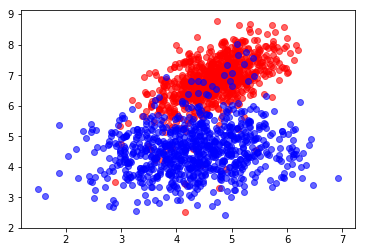

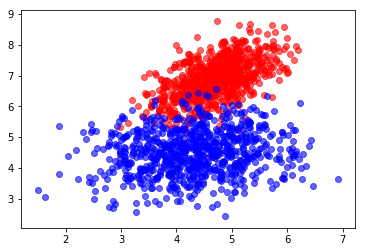

In [62]:
#Implement Part D:
df2m_class0 = df2m[df2m['y'] == 0].drop(['y'],axis=1).values
df2m_class1 = df2m[df2m['y'] == 1].drop(['y'],axis=1).values

plt.figure()
sc = plt.scatter(df2m_class0[:,0],df2m_class0[:,1],color="red",alpha=0.6)
sc = plt.scatter(df2m_class1[:,0],df2m_class1[:,1],color="blue",alpha=0.6)

plt.figure()
sc = plt.scatter(df2_class0[:,0],df2_class0[:,1],color="red",alpha=0.6)
sc = plt.scatter(df2_class1[:,0],df2_class1[:,1],color="blue",alpha=0.6)

prior_prob_df2m_class0 = len(df2m[df2m['y']==0]) / len(df2m)
prior_prob_df2m_class1 = len(df2m[df2m['y']==1]) / len(df2m)

cov_df2m_class0 = np.cov(np.transpose(df2m_class0))
cov_df2m_class1 = np.cov(np.transpose(df2m_class1))

mean_vector_df2m_class0 = np.transpose(df2m_class0.mean(0))
mean_vector_df2m_class1 = np.transpose(df2m_class1.mean(0))

print("Test 2-Modified Error: ", calculateError(test2,mean_vector_df2m_class0,mean_vector_df2m_class1,cov_df2m_class0,cov_df2m_class1,prior_prob_df2m_class0,prior_prob_df2m_class1), "%.")


# COMMENT
# D1) As we can see in the plot, the modified version has some points which are existing on irrelevant points.(outliers)
# D3) We know that Bayes classifier is not a good solution when dealing with outliers. If there is more outliers that means
# error rate will be higher. Therefoer error rate is increase

In [69]:
#deneme

import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
